In [1]:
from eigsep_cal import gain_cal
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

freq = np.linspace(0, 250, num=1024, endpoint=False)

/home/christian/Documents/research/eigsep/eigsep_cal/.venv/lib/python3.10/site-packages/eigsep_cal/gain_cal.py:62: RuntimeWarning: invalid value encountered in divide
  r = data / self.ref_gains[module]


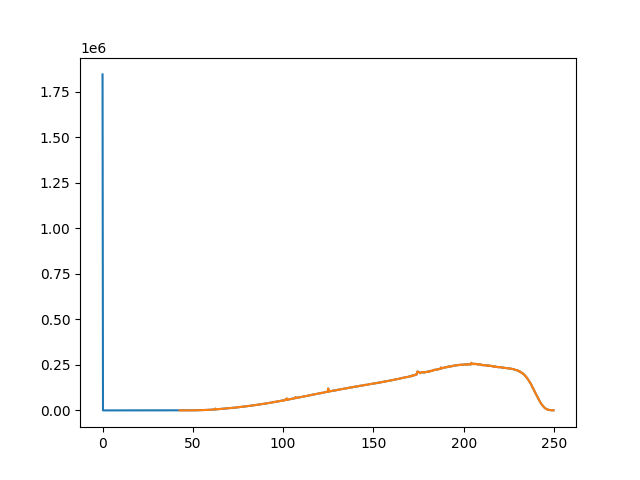

True


In [2]:
ref = gain_cal.SignalChain()
for k, v in ref.ref_config.items():
    ref.add_module(k, v)

plt.figure()
plt.plot(freq, ref.ref_signal)
plt.plot(freq, ref.ex_bandpass)
plt.show()

print(np.allclose(ref.ref_signal[freq>50], ref.ex_bandpass[freq>50]))

In [3]:
sc = gain_cal.SignalChain()
sc.add_module("fem", "348_north")
sc.add_module("fiber", "A")
sc.add_module("pam", "377_north")
sc.add_module("snap", "E6")

/home/christian/Documents/research/eigsep/eigsep_cal/.venv/lib/python3.10/site-packages/eigsep_cal/gain_cal.py:62: RuntimeWarning: divide by zero encountered in divide
  r = data / self.ref_gains[module]


/home/christian/Documents/research/eigsep/eigsep_cal/.venv/lib/python3.10/site-packages/eigsep_cal/gain_cal.py:72: RuntimeWarning: invalid value encountered in multiply
  sig = sig * self.gain_ratios[module]


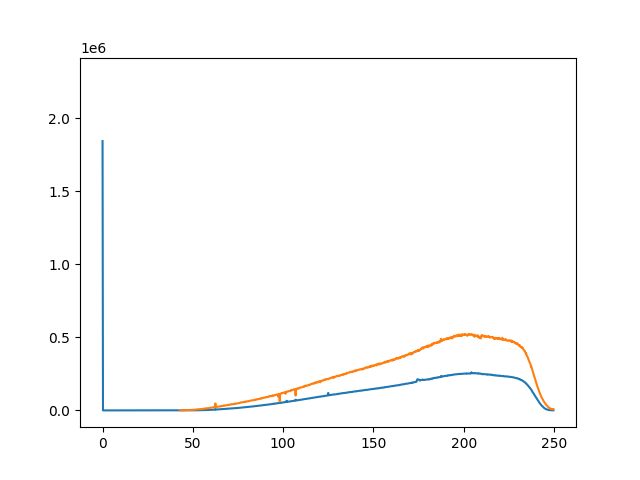

In [4]:
plt.figure()
plt.plot(freq, sc.ref_signal)
plt.plot(freq, sc.ex_bandpass)
plt.show()

# Measuremets Oct 18 at Hermits Cabin

In [5]:
DATA_DIR = "/home/christian/Documents/research/eigsep/eigsep_cal/gain_calibration/data/field_oct24"
dt = np.dtype(np.int32).newbyteorder(">")
ants = {"north": {}, "south": {}, "elev": {}}  # north is furthest into canyon, south by the camp

#### FEM 032, Fiber AB, PAM 376

In [6]:
data = np.load(f"{DATA_DIR}/fem032_fiberAB_pam376.npz")
ants["north"]["north"] = np.frombuffer(data["0"], dtype=dt)
ants["north"]["east"] = np.frombuffer(data["1"], dtype=dt)

In [7]:
east = gain_cal.SignalChain()
east.add_module("fem", "032_east")
east.add_module("fiber", "A")
east.add_module("pam", "376_east")
#east.add_module("snap", "E2")

north = gain_cal.SignalChain()
north.add_module("fem", "032_north")
north.add_module("fiber", "B")
north.add_module("pam", "376_north")
#north.add_module("snap", "E2")

In [8]:
# plt.figure()
# for k, v in east.gain_ratios.items():
#     if k == "snap":
#         plt.plot(v, label=k)
# plt.axhline(0)
# plt.legend()
# plt.show()

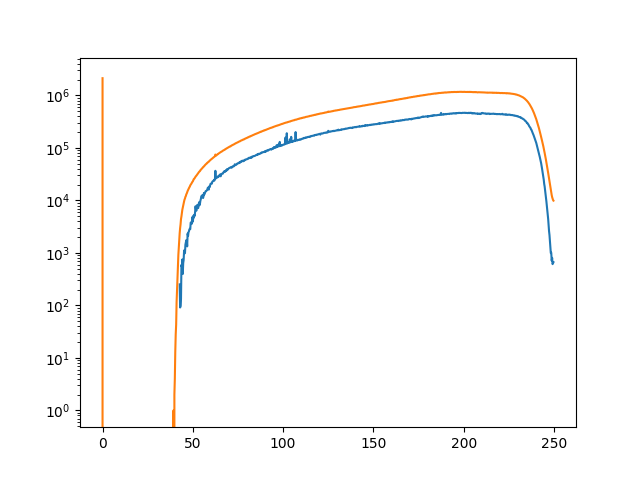

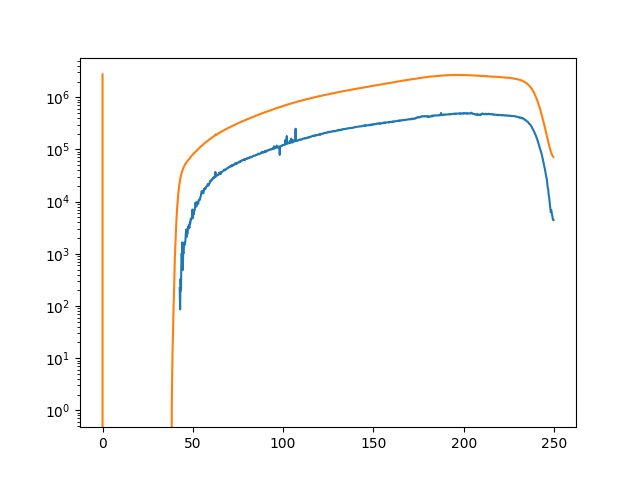

In [9]:
plt.figure()
plt.plot(freq, east.ex_bandpass)
plt.plot(freq, ants["north"]["east"])
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(freq, north.ex_bandpass)
plt.plot(freq, ants["north"]["north"])
plt.yscale("log")
plt.show()

#### FEM 348, Fiber EF, PAM 377

In [10]:
data = np.load(f"{DATA_DIR}/fem348_fiberEF_pam377.npz")
ants["south"]["north"] = np.frombuffer(data["2"], dtype=dt)
ants["south"]["east"] = np.frombuffer(data["3"], dtype=dt)

In [11]:
east = gain_cal.SignalChain()
east.add_module("fem", "348_east")
east.add_module("fiber", "E")
east.add_module("pam", "377_east")
#east.add_module("snap", "E2")

north = gain_cal.SignalChain()
north.add_module("fem", "348_north")
north.add_module("fiber", "F")
north.add_module("pam", "377_north")
#north.add_module("snap", "E2")

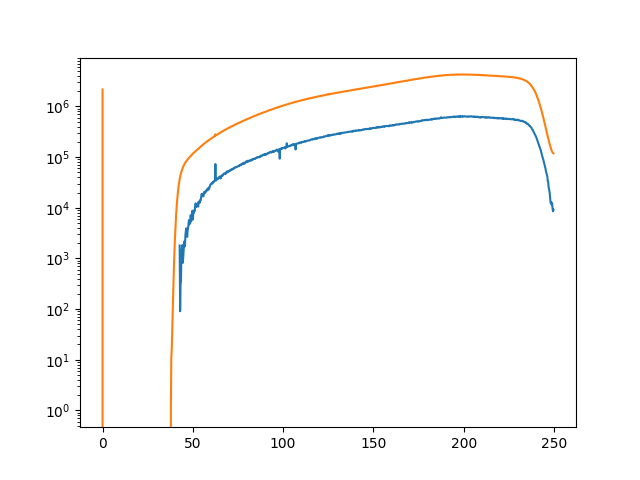

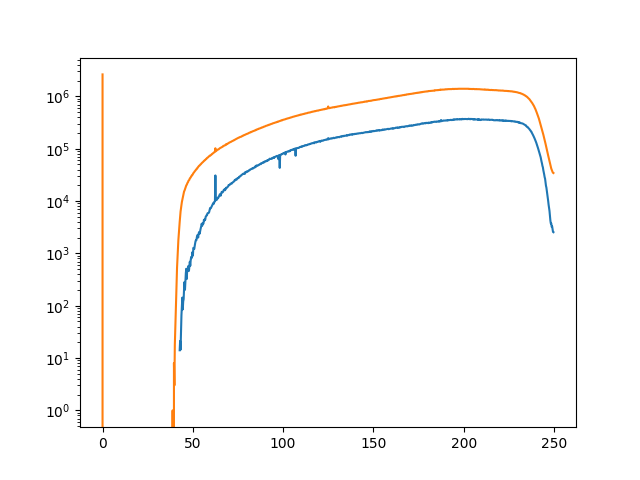

In [12]:
plt.figure()
plt.plot(freq, east.ex_bandpass)
plt.plot(freq, ants["south"]["east"])
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(freq, north.ex_bandpass)
plt.plot(freq, ants["south"]["north"])
plt.yscale("log")
plt.show()

#### FEM 320, Fiber CD, PAM 375

In [13]:
data = np.load(f"{DATA_DIR}/fem320_fiberCD_pam375.npz")
ants["elev"]["north"] = np.frombuffer(data["4"], dtype=dt)
ants["elev"]["east"] = np.frombuffer(data["5"], dtype=dt)

In [14]:
east = gain_cal.SignalChain()
east.add_module("fem", "320_east")
east.add_module("fiber", "C")
east.add_module("pam", "375_east")
#east.add_module("snap", "E2")

north = gain_cal.SignalChain()
north.add_module("fem", "320_north")
north.add_module("fiber", "D")
north.add_module("pam", "375_north")
#north.add_module("snap", "E2")

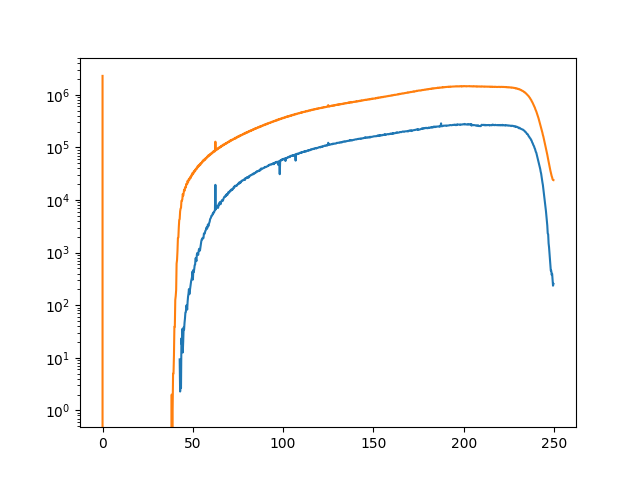

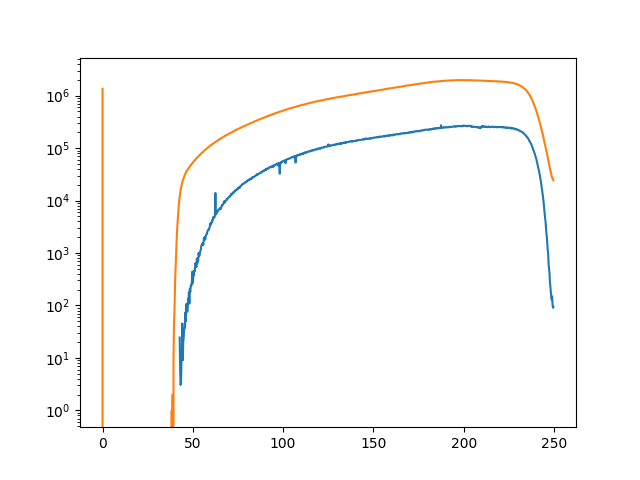

In [15]:
plt.figure()
plt.plot(freq, east.ex_bandpass)
plt.plot(freq, ants["elev"]["east"])
plt.yscale("log")
plt.show()

plt.figure()
plt.plot(freq, north.ex_bandpass)
plt.plot(freq, ants["elev"]["north"])
plt.yscale("log")
plt.show()

### Comparing all antennas

In [18]:
DATA_DIR

'/home/christian/Documents/research/eigsep/eigsep_cal/gain_calibration/data/field_oct24'

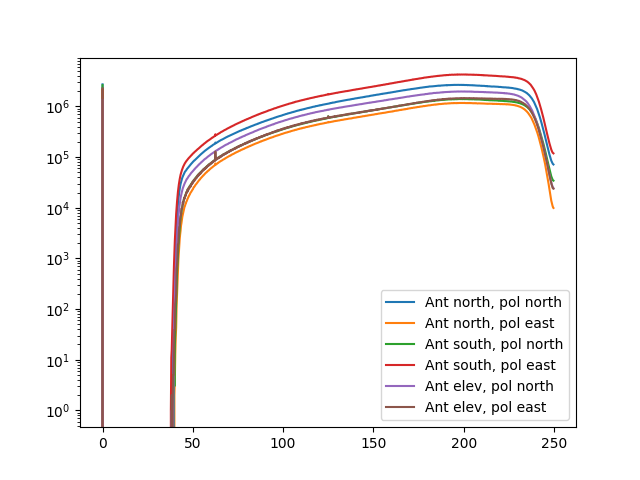

In [17]:
ants = np.load(f"{DATA_DIR}/ants_load.npz", allow_pickle=True)

plt.figure()
for a in ants:
    for p in ["north", "east"]:
        plt.plot(freq, ants[a][()][p], label=f"Ant {a}, pol {p}")
plt.legend()
plt.yscale("log")
plt.show()